POSIBLES PREGUNTAS:
- Relación entre el género(mujeres) con el tamaño de empresa.

- Herramientas más utilizadas segun el puesto: business o data.

- Título académico y salario.

- Paises: haceer un top10.

REPASAR:

Split, explode: lenguaje programación. Cantidad de gente que utiliza Python, SQL, R...


INICIAR LA PRESENTACIÓN: Historia de los perfiles de los analistas de datos: presentar a modo informativo y enlazarlo

    - ¿Cómo es el perfil de un analista y business?
    
    - ¿Hay diferencias entre el perfil de un business y un data?

¿A quién va dirigido el curso? ¿Qué ofrece?
    - Pais
    
    - Género
    
    - Salario
    
    - Herramientas: cuales utilizan los Business y los Data


Como es un perfil del Analista de Datos


¿A quién me quiero dirigir?
    
    - a mujeres (brecha género)

¿Su cv está adaptado a lo que pide el mercado?

GRAFICAS:

-Grafica 1: ¿A mayor edad mayor brecha de género? Comparar columnas edades y género.

-Grafica 2: Comparar lenguajes_programacion(top5).

-Grafica 3: ¿Dónde se está contratando a más gente de Business/Data? Ubicar España dentro de ese mercado de contratación.

-Gráfica 4: tamaño_empresa con brecha género.

-Gráfica 5: sector laboral con empresas (qué sector contrata a más bussines o data para que adalab enfoque sus proyectos en este sector)

-Gráfica 6: Salarios y género: buena pregunta.

"""

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import re
import sidetable

In [2]:
df = pd.read_csv('../datos/Dataframe_final.csv', index_col = 0)
df.head()

,edades,genero,salarios,paises,titulo_academico,puesto_trabajo,años_experiencia,sector_laboral,tamaños_empresa,lenguaje_programacion
16,45-59,Man,bajo,Belgium,Bachelor’s degree,Data Analyst,20+ years,Energy/Mining,Grande,"Python, SQL"
32,18-29,Nonbinary,No sabe/No contesta,United States of America,Some college/university study without earning ...,Data Analyst,< 1 years,Manufacturing/Fabrication,Mediana,R
33,30-44,Woman,bajo,Egypt,Bachelor’s degree,Data Analyst,3-5 years,Non-profit/Service,Startup,Python
46,18-29,Man,No sabe/No contesta,China,Some college/university study without earning ...,Data Analyst,< 1 years,Computers/Technology,Startup,"Python, SQL, C, C++, Java, Javascript, MATLAB"
52,30-44,Man,medio,South Africa,Master’s degree,Data Analyst,1-3 years,Manufacturing/Fabrication,Mediana,"R, SQL"


In [3]:
df.dtypes

edades                   object
genero                   object
salarios                 object
paises                   object
titulo_academico         object
puesto_trabajo           object
años_experiencia         object
sector_laboral           object
tamaños_empresa          object
lenguaje_programacion    object
dtype: object

- Gráfica 1: ¿A mayor edad mayor brecha de género? Comparar columnas edades y género.

In [4]:
df_genero = df[(df['genero'] == 'Man') | (df['genero'] == 'Woman')]
df_genero.head()

,edades,genero,salarios,paises,titulo_academico,puesto_trabajo,años_experiencia,sector_laboral,tamaños_empresa,lenguaje_programacion
16,45-59,Man,bajo,Belgium,Bachelor’s degree,Data Analyst,20+ years,Energy/Mining,Grande,"Python, SQL"
33,30-44,Woman,bajo,Egypt,Bachelor’s degree,Data Analyst,3-5 years,Non-profit/Service,Startup,Python
46,18-29,Man,No sabe/No contesta,China,Some college/university study without earning ...,Data Analyst,< 1 years,Computers/Technology,Startup,"Python, SQL, C, C++, Java, Javascript, MATLAB"
52,30-44,Man,medio,South Africa,Master’s degree,Data Analyst,1-3 years,Manufacturing/Fabrication,Mediana,"R, SQL"
53,30-44,Man,alto,Other,Master’s degree,Business Analyst,1-3 years,Accounting/Finance,Pequeña,"Python, SQL, Other"


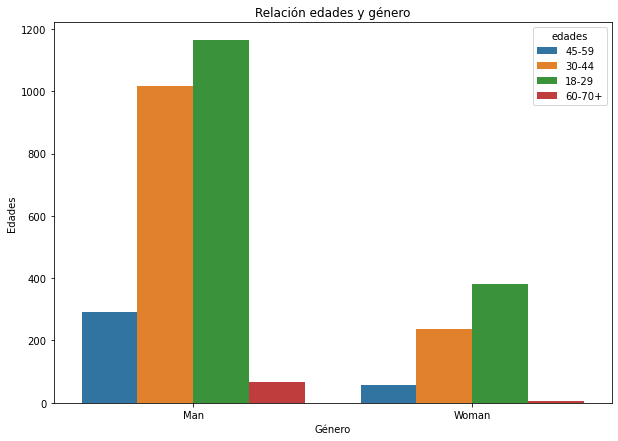

In [5]:
plt.figure(figsize =(10,7))

fig = sns.countplot(x = 'genero', data = df_genero, hue = 'edades')
fig.set( xlabel = 'Género', ylabel = 'Edades')

fig.set_title('Relación edades y género');

- Gráfica 2

In [6]:
df["lenguaje_programacion"].unique()

array(['Python, SQL', ' R', 'Python',
       'Python, SQL, C, C++, Java, Javascript, MATLAB', ' R, SQL',
       'Python, SQL, Other', ' SQL, C++', ' R, SQL, C++', ' SQL',
       'Python, SQL, Javascript', 'Python, SQL, C, Javascript',
       'No sabe/No contesta', 'Python, SQL, C++, Other', 'Python, R, SQL',
       'Python, R, SQL, C, C++', 'Python, R', ' C++', 'Python, R, Other',
       ' None', 'Python, SQL, Java, Javascript', 'Python, R, MATLAB',
       'Python, R, SQL, C++, MATLAB', 'Python, SQL, C++',
       'Python, SQL, Javascript, Other', 'Python, R, SQL, MATLAB',
       'Python, SQL, MATLAB', 'Python, R, C, C++', 'Python, Javascript',
       'Python, SQL, Javascript, Bash', ' C, C++, MATLAB', 'Python, Java',
       ' SQL, Java', 'Python, R, SQL, Other',
       'Python, SQL, C++, Javascript, Bash', 'Python, C++, Java, MATLAB',
       'Python, Javascript, Other', 'Python, R, SQL, Javascript',
       'Python, C', 'Python, R, SQL, C, C++, Java',
       'Python, R, SQL, Java, Javas

In [7]:
df_lenguajes = pd.DataFrame(df["lenguaje_programacion"].value_counts())
df_lenguajes.head()

,lenguaje_programacion
"Python, SQL",622
Python,481
"Python, R, SQL",319
No sabe/No contesta,275
"Python, R",140


In [8]:
# Creamos una funcion que dividirá los strings de la columna lenguajes_programacion
def split_string(lenguajes):
    try:
        return [lenguaje.strip() for lenguaje in lenguajes.split(',')]
    except:
        return ["sin responder"]

In [9]:
df["lenguaje_programacion"].value_counts()

Python, SQL                                        622
Python                                             481
Python, R, SQL                                     319
No sabe/No contesta                                275
Python, R                                          140
                                                  ... 
Python, R, SQL, C, C++, Java, Javascript, Other      1
Python, R, Javascript, Bash                          1
Python, C, C++, Java, Other                          1
Python, R, SQL, Swift                                1
Python, R, SQL, Java, Javascript, Other              1
Name: lenguaje_programacion, Length: 251, dtype: int64

In [10]:
df['lenguaje_programacion'] = list(df['lenguaje_programacion'].apply(split_string))


In [11]:
# Contamos la frecuencia de cada lenguaje
# Creamos un diccionario en el que tendremos el conteo

conteo_lenguajes = {}
for lenguajes in df['lenguaje_programacion']:
    
        for lenguaje in lenguajes:
            if lenguaje in conteo_lenguajes:
                conteo_lenguajes[lenguaje] += 1
            else:
                conteo_lenguajes[lenguaje] = 1
print(conteo_lenguajes)

{'Python': 2465, 'SQL': 1866, 'R': 928, 'C': 240, 'C++': 288, 'Java': 300, 'Javascript': 327, 'MATLAB': 230, 'Other': 300, 'No sabe/No contesta': 275, 'None': 59, 'Bash': 131, 'Julia': 21, 'Swift': 20}


In [12]:
df_conteo_lenguajes = pd.DataFrame(conteo_lenguajes, index = [0]) 
df_conteo_lenguajes 

,Python,SQL,R,C,C++,Java,Javascript,MATLAB,Other,No sabe/No contesta,None,Bash,Julia,Swift
0,2465,1866,928,240,288,300,327,230,300,275,59,131,21,20


In [13]:
df_top5 = df_conteo_lenguajes.sum().sort_values(ascending = False).iloc[:5].reset_index()
df_top5

,index,0
0,Python,2465
1,SQL,1866
2,R,928
3,Javascript,327
4,Java,300


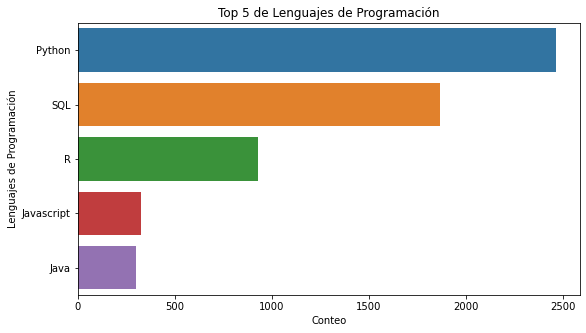

In [14]:
plt.figure(figsize = (9, 5))

fig = sns.barplot(x = 0 , y = 'index', data = df_top5)
fig.set(xlabel = 'Conteo', ylabel = 'Lenguajes de Programación')

fig.set_title('Top 5 de Lenguajes de Programación');

- Gráfica 3 ¿Dónde se está contratando a más gente de Business/Data? Ubicar España dentro de ese mercado de contratación.

In [15]:
df_paises = df["paises"].value_counts().iloc[:17].reset_index()
df_paises = df_paises[df_paises["index"] != 'Other']
df_paises

,index,paises
0,India,795
1,United States of America,367
3,Nigeria,132
4,China,121
5,Brazil,110
6,Russia,108
7,Egypt,101
8,Japan,84
9,United Kingdom of Great Britain and Northern I...,77
10,Indonesia,60


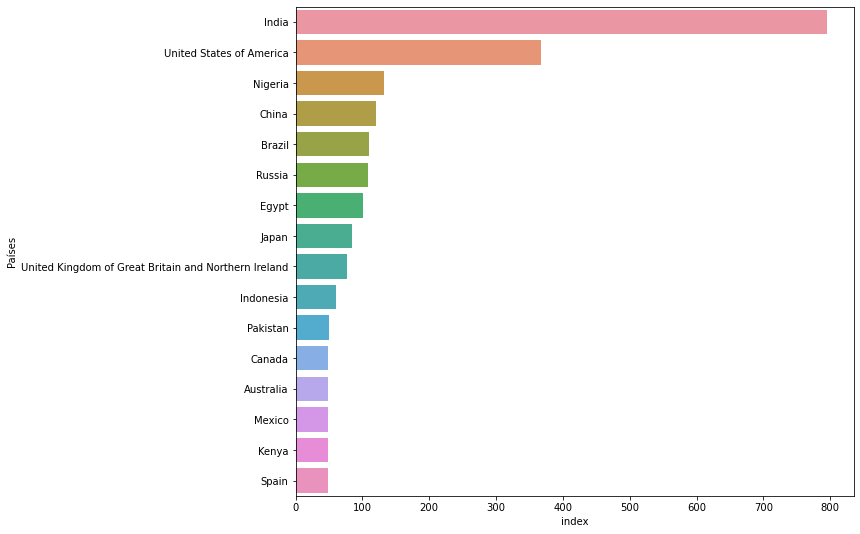

In [16]:
plt.figure(figsize =(10, 9))

fig = sns.barplot(x = 'paises', y = 'index', data = df_paises)
fig.set(xlabel = 'index', ylabel = 'Países')

fig.set_title('');

- Gráfica 4: tamaño_empresa con brecha género.

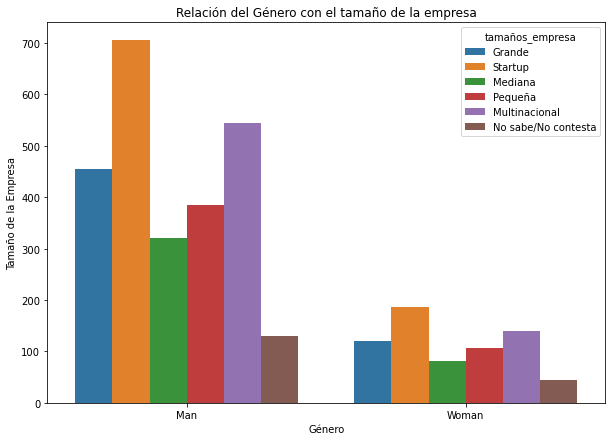

In [18]:
plt.figure(figsize =(10,7))

fig = sns.countplot(x = 'genero', data = df_genero, hue = 'tamaños_empresa')
fig.set( xlabel = 'Género', ylabel = 'Tamaño de la Empresa')

fig.set_title('Relación del Género con el Tamaño de la Empresa');

- Gráfica 5: sector laboral con empresas (qué sector contrata a más bussines o data para que adalab enfoque sus proyectos en este sector)


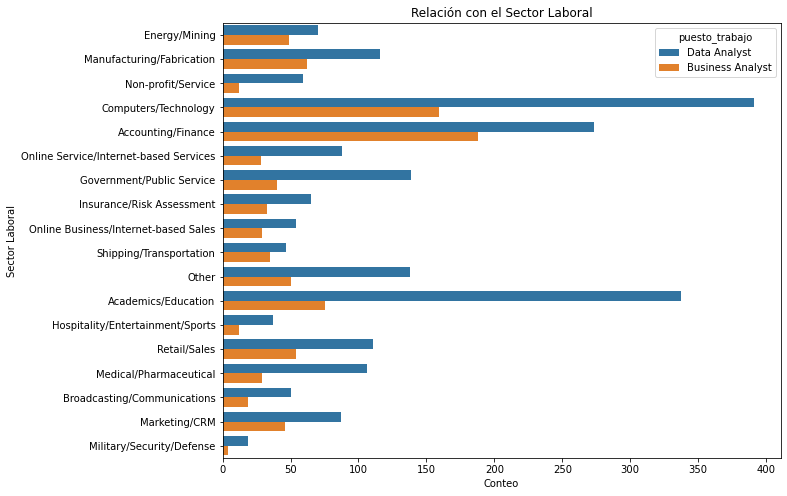

In [63]:
plt.figure(figsize = (10, 8))

fig = sns.countplot(y = 'sector_laboral', data = df, hue = 'puesto_trabajo')
fig.set(ylabel = 'Sector Laboral', xlabel = 'Conteo')

fig.set_title('Relación con el Sector Laboral');


- Gráfica 6: Salarios y género: buena pregunta.

In [69]:
lista_genero = ['Man', 'Woman']

lista_salario = ['bajo', 'medio', 'alto']  

In [71]:
df_salario_genero = df[df['genero'].isin(lista_genero)]

In [72]:
df_salario_genero = df_salario_genero[df_salario_genero['salarios'].isin(lista_salario)]

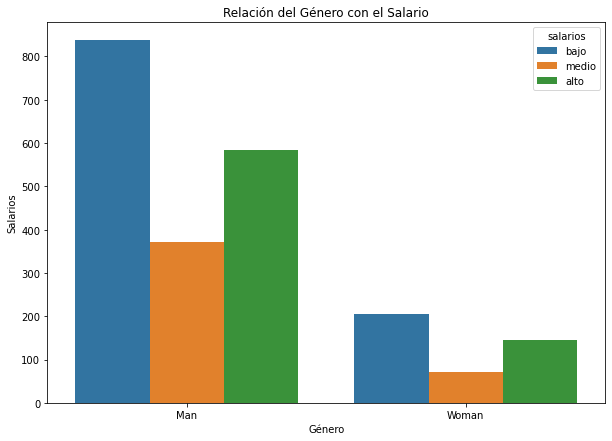

In [73]:
plt.figure(figsize =(10,7))

fig = sns.countplot(x = 'genero', data = df_salario_genero, hue = 'salarios')
fig.set( xlabel = 'Género', ylabel = 'Salarios')

fig.set_title('Relación del Género con el Salario');